In [72]:
# Gradient Boosting
# 지도 학습 y가 있는
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import mglearn

cancer = load_breast_cancer()
col_names = cancer.feature_names
print(len(col_names)) #컬럼이 30개라는 뜻

X_Data = pd.DataFrame(cancer.data,columns = col_names) #지도학습에는 X, y가 있다
y = pd.DataFrame(cancer.target) #연습 하라고 

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

30


In [3]:
# AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)#estimators = tree 갯수(100개) 가중치를 업데이트한다
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [4]:
print("훈련 세트 정확도 : {:.3f}".format(ada.score(X_train, y_train))) #소수점 3째 자리 표시
print("테스트 세트 정확도 : {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


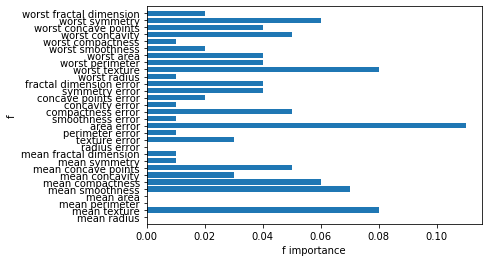

In [5]:
n_features = cancer.data.shape[1]

plt.barh(range(n_features), ada.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("f importance")
plt.ylabel("f")
plt.ylim(-1, n_features)
plt.show()

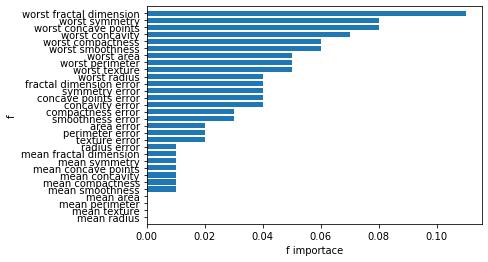

In [6]:
# 깔끔하게 보고 싶을 때 np.sort 하면 된다.
n_features = cancer.data.shape[1]

plt.barh(range(n_features), np.sort(ada.feature_importances_), align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("f importace")
plt.ylabel("f")
plt.ylim(-1, n_features)
plt.show()

In [7]:
# max_depth default 값은 3임
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print

훈련 세트 정확도 : 1.000


<function print>

In [8]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [9]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


In [11]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate : ", learning_rate)
    print("Accuracy score (training) : {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation) : {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate :  0.05
Accuracy score (training) : 0.984
Accuracy score (validation) : 0.958
Learning rate :  0.075
Accuracy score (training) : 0.993
Accuracy score (validation) : 0.958
Learning rate :  0.1
Accuracy score (training) : 0.995
Accuracy score (validation) : 0.958
Learning rate :  0.25
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.979
Learning rate :  0.5
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.972
Learning rate :  0.75
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.965
Learning rate :  1
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.944


In [13]:
from sklearn.metrics import classification_report
gb_clf2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.25, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



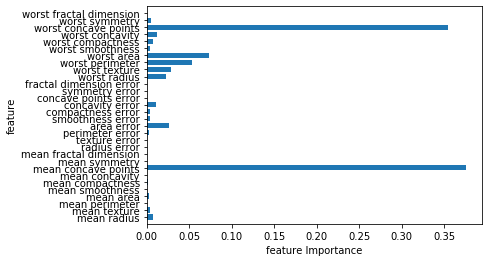

In [14]:
n_feature = cancer.data.shape[1]

plt.barh(range(n_features), gb_clf2.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("feature Importance")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

In [74]:
#와인 데이터

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_wine

wine = load_wine()
col_names = wine.feature_names
print(len(col_names))

X_Data = pd.DataFrame(wine.data, columns = col_names)
y = pd.DataFrame(wine.target)

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=0)

13


In [17]:
# AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)#estimators = tree 갯수(100개) 가중치를 업데이트한다
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [18]:
print("훈련 세트 정확도 : {:.3f}".format(ada.score(X_train, y_train))) #소수점 3째 자리 표시
print("테스트 세트 정확도 : {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도 : 0.976
테스트 세트 정확도 : 0.889


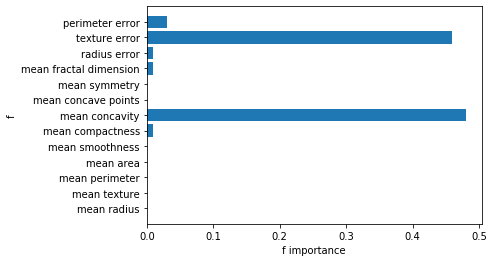

In [20]:
n_features = wine.data.shape[1]

plt.barh(range(n_features), ada.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("f importance")
plt.ylabel("f")
plt.ylim(-1, n_features)
plt.show()

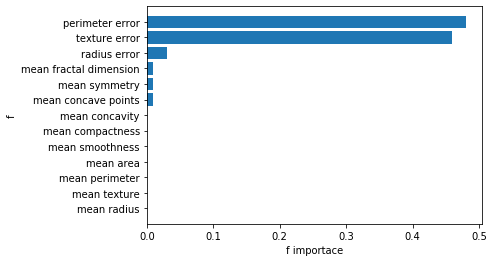

In [21]:
# 깔끔하게 보고 싶을 때 np.sort 하면 된다.
n_features = wine.data.shape[1]

plt.barh(range(n_features), np.sort(ada.feature_importances_), align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("f importace")
plt.ylabel("f")
plt.ylim(-1, n_features)
plt.show()

In [22]:
# max_depth default 값은 3임
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print

훈련 세트 정확도 : 1.000


<function print>

In [23]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.963


In [24]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.944


In [25]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate : ", learning_rate)
    print("Accuracy score (training) : {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation) : {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate :  0.05
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.963
Learning rate :  0.075
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.963
Learning rate :  0.1
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.981
Learning rate :  0.25
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.963
Learning rate :  0.5
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.963
Learning rate :  0.75
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.963
Learning rate :  1
Accuracy score (training) : 1.000
Accuracy score (validation) : 0.963


In [26]:
from sklearn.metrics import classification_report
gb_clf2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.25, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [27]:
!pip install xgboost

In [66]:
# 유방암 
# xgBoosting 실습

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#import mglearn

cancer = load_breast_cancer()
col_names = cancer.feature_names
print(len(col_names)) #컬럼이 30개라는 뜻

X_Data = pd.DataFrame(cancer.data,columns = col_names) #지도학습에는 X, y가 있다
y = pd.DataFrame(cancer.target) #연습 하라고 

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

30


In [75]:
from xgboost import plot_importance #주요변수를 자체적으로 파라미터만 넣어주면 찾아준다
from xgboost import XGBClassifier

import xgboost as xgb

In [67]:
#500번의 트리가 생성된다. max_depth의 최대값은 5이다.

xgbb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=42)
xgbb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
print("훈련 세트 정확도 : {:.3f}".format(xgbb.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(xgbb.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


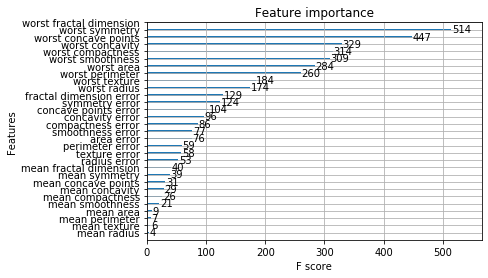

In [50]:
import matplotlib.pyplot as plt
plot_importance(xgbb)
plt.yticks(range(len(col_names)), col_names)
plt.show()

mean perimeter             0.000000
mean fractal dimension     0.001348
mean compactness           0.003409
worst fractal dimension    0.004356
mean concavity             0.004462
worst compactness          0.004719
worst symmetry             0.005157
smoothness error           0.005919
mean radius                0.006442
concave points error       0.006886
symmetry error             0.007753
worst smoothness           0.007974
texture error              0.008438
compactness error          0.009900
concavity error            0.010351
mean smoothness            0.011029
area error                 0.011221
mean symmetry              0.012301
mean area                  0.014500
perimeter error            0.014916
fractal dimension error    0.015012
radius error               0.019017
worst texture              0.021520
mean texture               0.021834
worst concavity            0.024431
worst radius               0.036750
worst area                 0.037053
worst concave points       0

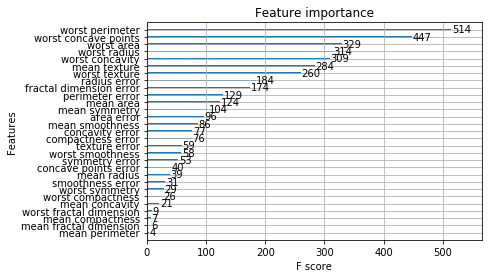

In [38]:
import matplotlib.pyplot as plt

feature_imp =pd.Series(xgbb.feature_importances_, index=cancer.feature_names).sort_values(ascending=True)
feature_imp
print(feature_imp)
print(feature_imp.index)

plot_importance(xgbb).set_yticklabels(feature_imp.index)
plt.show()


In [76]:
xg = XGBClassifier()

param_grid = {
    'max_depth' : [4, 6, 8, 10, 12],
    'n_estimators' : [50, 100],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15]}

In [81]:
xgbbb = XGBClassifier()

param_grid = {
    'max_depth' : [4, 6, 8, 10, 12],
    'n_estimators' : [50, 100],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15]}

In [77]:
from sklearn.model_selection import GridSearchCV

In [82]:
gcv = GridSearchCV(xgbbb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [83]:
print("final params", gcv.best_params_) # 최적의 파라미터 값 출력
print("best score", gcv.best_score_)

final params {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
best score 0.9436666666666665


In [ ]:
#와인 데이터

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_wine

wine = load_wine()
col_names = wine.feature_names
print(len(col_names))

X_Data = pd.DataFrame(wine.data, columns = col_names)
y = pd.DataFrame(wine.target)

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=0)

In [ ]:
from xgboost import plot_importance #주요변수를 자체적으로 파라미터만 넣어주면 찾아준다
from xgboost import XGBClassifier

import xgboost as xgb

In [ ]:
#500번의 트리가 생성된다. max_depth의 최대값은 5이다.

xgbb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=42)
xgbb.fit(X_train, y_train)

In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(xgbb.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(xgbb.score(X_test, y_test)))

In [88]:
def get_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred,
                                             average='macro')
    f_scro = f1_score(y_test, y_pred, 
                                             average='macro')
    print('\n정확도 : {:.4f}'.format(accuracy))
    print('정밀도 : {:.4f}'.format(precision))
    print('재현율 : {:.4f}'.format(recall))
    print('fscore : {:.4f}'.format(f_scro))

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score


In [90]:
xgb_wine = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3, objective = 'multi:softmax')

xgb_wine.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric="mlogloss", eval_set = [(X_test, y_test)], verbose = True)
ws100_preds = xgb_wine.predict(X_test)
get_eval(y_test, ws100_preds)

[0]	validation_0-mlogloss:0.97868
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:0.88470
[2]	validation_0-mlogloss:0.80385
[3]	validation_0-mlogloss:0.72988
[4]	validation_0-mlogloss:0.66679
[5]	validation_0-mlogloss:0.61363
[6]	validation_0-mlogloss:0.56527
[7]	validation_0-mlogloss:0.52163
[8]	validation_0-mlogloss:0.48128
[9]	validation_0-mlogloss:0.44640
[10]	validation_0-mlogloss:0.41552
[11]	validation_0-mlogloss:0.38796
[12]	validation_0-mlogloss:0.36401
[13]	validation_0-mlogloss:0.34254
[14]	validation_0-mlogloss:0.32274
[15]	validation_0-mlogloss:0.30522
[16]	validation_0-mlogloss:0.28927
[17]	validation_0-mlogloss:0.27572
[18]	validation_0-mlogloss:0.26347
[19]	validation_0-mlogloss:0.25071
[20]	validation_0-mlogloss:0.24099
[21]	validation_0-mlogloss:0.23180
[22]	validation_0-mlogloss:0.22453
[23]	validation_0-mlogloss:0.21675
[24]	validation_0-mlogloss:0.20952
[25]	validation_0-mlogloss:0.20289
[26]	validation_0-mlogloss:0.1

[229]	validation_0-mlogloss:0.10632
[230]	validation_0-mlogloss:0.10632
[231]	validation_0-mlogloss:0.10632
[232]	validation_0-mlogloss:0.10632
[233]	validation_0-mlogloss:0.10632
[234]	validation_0-mlogloss:0.10632
[235]	validation_0-mlogloss:0.10632
[236]	validation_0-mlogloss:0.10632
[237]	validation_0-mlogloss:0.10632
[238]	validation_0-mlogloss:0.10632
[239]	validation_0-mlogloss:0.10632
[240]	validation_0-mlogloss:0.10632
[241]	validation_0-mlogloss:0.10632
[242]	validation_0-mlogloss:0.10632
[243]	validation_0-mlogloss:0.10632
[244]	validation_0-mlogloss:0.10632
[245]	validation_0-mlogloss:0.10632
[246]	validation_0-mlogloss:0.10632
[247]	validation_0-mlogloss:0.10632
[248]	validation_0-mlogloss:0.10632
[249]	validation_0-mlogloss:0.10632
[250]	validation_0-mlogloss:0.10632
[251]	validation_0-mlogloss:0.10632
[252]	validation_0-mlogloss:0.10632
[253]	validation_0-mlogloss:0.10632
[254]	validation_0-mlogloss:0.10632
[255]	validation_0-mlogloss:0.10632
[256]	validation_0-mlogloss:

In [92]:
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
boston = load_boston()
X = boston.data
y = boston.target
col_names = boston.feature_names

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =  0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)


(354, 13)
(152, 13)


In [97]:
model = XGBRegressor(objective = 'reg:squarederror')
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [98]:
y_predd = model.predict(x_test)
y_true = y_test


In [99]:
mse = mean_squared_error(y_true, y_predd)
mse

9.238913100991956

In [100]:
!pip install lightgbm

In [122]:
# Lightboosting
# 지도 학습 y가 있는
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import mglearn

cancer = load_breast_cancer()
col_names = cancer.feature_names
print(len(col_names)) #컬럼이 30개라는 뜻

X_Data = pd.DataFrame(cancer.data,columns = col_names) #지도학습에는 X, y가 있다
y = pd.DataFrame(cancer.target) #연습 하라고 

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, test_size=0.3, random_state=0)

30


In [116]:
# ▪ Xgboosting 을 해결하기 위해 나온 모델로 대용량의 데이터에서 사용 가능
# ▪ Level-wise 방법의 Xgboosting은 tree의 균형을 잡아주지만, 연산이 많고 LightGBM은 트리의 균형은 맞추지 않고 리
# 프노드를 지속적으로 분할
# ▪ leaf-wise 알고리즘은 level-wise 알고리즘보다 더 많은 loss, 손실을 줄임 Loss 변화가 큰 노드에서 데이터를 분할 성
# 장. 수직 성장
# ▪ 학습데이터가 많을 경우 뛰어난 성능

from lightgbm import LGBMClassifier, plot_importance

In [123]:
from lightgbm import LGBMClassifier, plot_importance

In [144]:
lgb = LGBMClassifier(n_estimators = 500, random_state=42)

X_train = pd.DataFrame(X_train, columns=cancer.feature_names)

lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [132]:
print("훈련 세트 정확도 : {:.3f}".format(lgb.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(lgb.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.982


In [136]:
evals = [(X_test, y_test)]

In [139]:
lgb.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric="logloss", eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.586823
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.526709
[3]	valid_0's binary_logloss: 0.477581
[4]	valid_0's binary_logloss: 0.436373
[5]	valid_0's binary_logloss: 0.399279
[6]	valid_0's binary_logloss: 0.368723
[7]	valid_0's binary_logloss: 0.340836
[8]	valid_0's binary_logloss: 0.319645
[9]	valid_0's binary_logloss: 0.298327
[10]	valid_0's binary_logloss: 0.280855
[11]	valid_0's binary_logloss: 0.266241
[12]	valid_0's binary_logloss: 0.247349
[13]	valid_0's binary_logloss: 0.234527
[14]	valid_0's binary_logloss: 0.221244
[15]	valid_0's binary_logloss: 0.207765
[16]	valid_0's binary_logloss: 0.199912
[17]	valid_0's binary_logloss: 0.19161
[18]	valid_0's binary_logloss: 0.179834
[19]	valid_0's binary_logloss: 0.170762
[20]	valid_0's binary_logloss: 0.161701
[21]	valid_0's binary_logloss: 0.154743
[22]	valid_0's binary_logloss: 0.151167
[23]	valid_0's binary_logloss: 0.145069
[24]	valid_0's binary_loglos

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

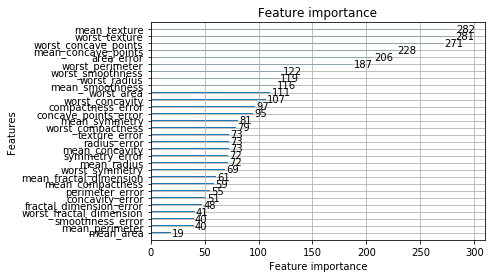

In [149]:
import matplotlib.pyplot as plt
plot_importance(lgb)
#plt.yticks(range(len(col_names)), col_names)
plt.show()

In [154]:
lb = LGBMClassifier()

param_grid={
#    'max_depth' : [4,6,8,10,12],
    'n_estimators' : [50, 100],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15]}

In [157]:
lgb_cv = GridSearchCV(lb, param_grid, cv=5, scoring='accuracy', n_jobs=1)
lgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'n_es

In [158]:
print('final params', lgb_cv.best_params_) #최적의 파라미터 값 출력
print('best score', lgb_cv.best_score_)

final params {'learning_rate': 0.15, 'n_estimators': 50}
best score 0.9699367088607594


In [164]:
cv_result_df = pd.DataFrame(lgb_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [165]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
6,"{'learning_rate': 0.15, 'n_estimators': 50}",0.969937,1
7,"{'learning_rate': 0.15, 'n_estimators': 100}",0.964873,2
5,"{'learning_rate': 0.1, 'n_estimators': 100}",0.964842,3
3,"{'learning_rate': 0.05, 'n_estimators': 100}",0.957310,4
4,"{'learning_rate': 0.1, 'n_estimators': 50}",0.957310,4
2,"{'learning_rate': 0.05, 'n_estimators': 50}",0.939747,6
1,"{'learning_rate': 0.01, 'n_estimators': 100}",0.919589,7
0,"{'learning_rate': 0.01, 'n_estimators': 50}",0.899462,8
